## Problem Statement:
## A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  
### Use dataset : Company_Data

 ### Importing required libraries & dataset

In [1]:
#!pip install category_encoders
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Importing the dataset
company_data = pd.read_csv('C:\Vishal\ExcelR\Data Science\Assignments\Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# Checking for null values
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
import category_encoders as ce
# Encoding variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company_data1 = encoder.fit_transform(company_data)

In [6]:
# Converting the Target column i.e. Sales into Categorical value using mean of the column i.e. 7.49
sales_val = []
for value in company_data1["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
company_data1["sales_val"]= sales_val

In [7]:
company_data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low


In [8]:
# Splitting data into input & output variables 
x = company_data1.drop(['sales_val','Sales'], axis =1)
y = company_data1['sales_val']

In [9]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2


In [10]:
y.head()

0    high
1    high
2    high
3     low
4     low
Name: sales_val, dtype: object

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

### Iteration - 1: Max Depth = 4

In [12]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test))
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train))

Test data Accuracy is: 0.675
Train data Accuracy is: 0.784375


### Iteration - 2: Max Depth = 5

In [14]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test))
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train))

Test data Accuracy is: 0.675
Train data Accuracy is: 0.821875


### Iteration - 3: Max Depth = 6

In [16]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [17]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

Test data Accuracy is: 0.675
Train data Accuracy is: 0.909375


### Iteration - 4: Max Depth = 7

In [18]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [19]:
#Predicting on test data
pred_test4 = model4.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test4==y_test))
#Predicting on train data
pred_train4 = model4.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train4==y_train))

Test data Accuracy is: 0.6625
Train data Accuracy is: 0.91875


#### We're getting the best test results at Iteration - 2 max depth = 5. so we will consider that final

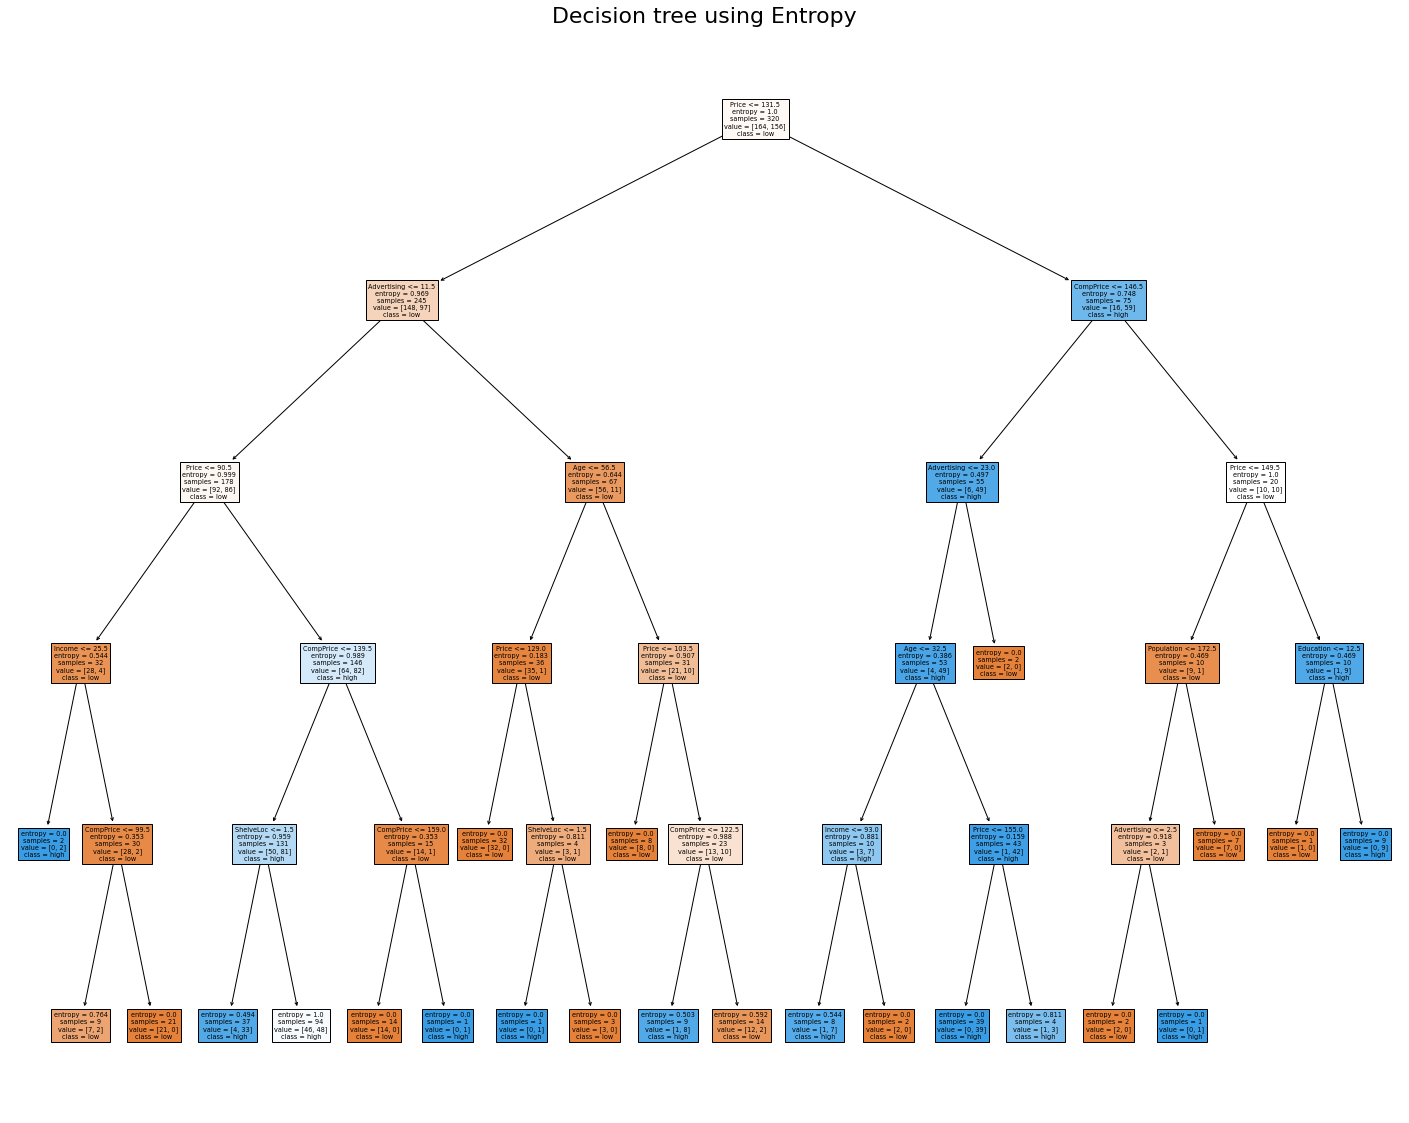

In [20]:
# Plotting the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.pdf')

#### From the above decision tree 3 most important features affecting the sales are-
1) Price

2) Advertising

3) Comp Price

### Building Decision Tree Classifier (CART) using Gini Criteria

### Iteration - 1: Max Depth = 5

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.7375
Train data Accuracy is: 0.8875


### Iteration - 2: Max Depth = 6

In [23]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [24]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test))
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train))

Test data Accuracy is: 0.675
Train data Accuracy is: 0.925


### Iteration - 3: Max Depth = 7

In [25]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [26]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test))
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train))

Test data Accuracy is: 0.65
Train data Accuracy is: 0.971875


#### We're getting the best test results at Iteration - 1 max depth = 5. so we will consider that final

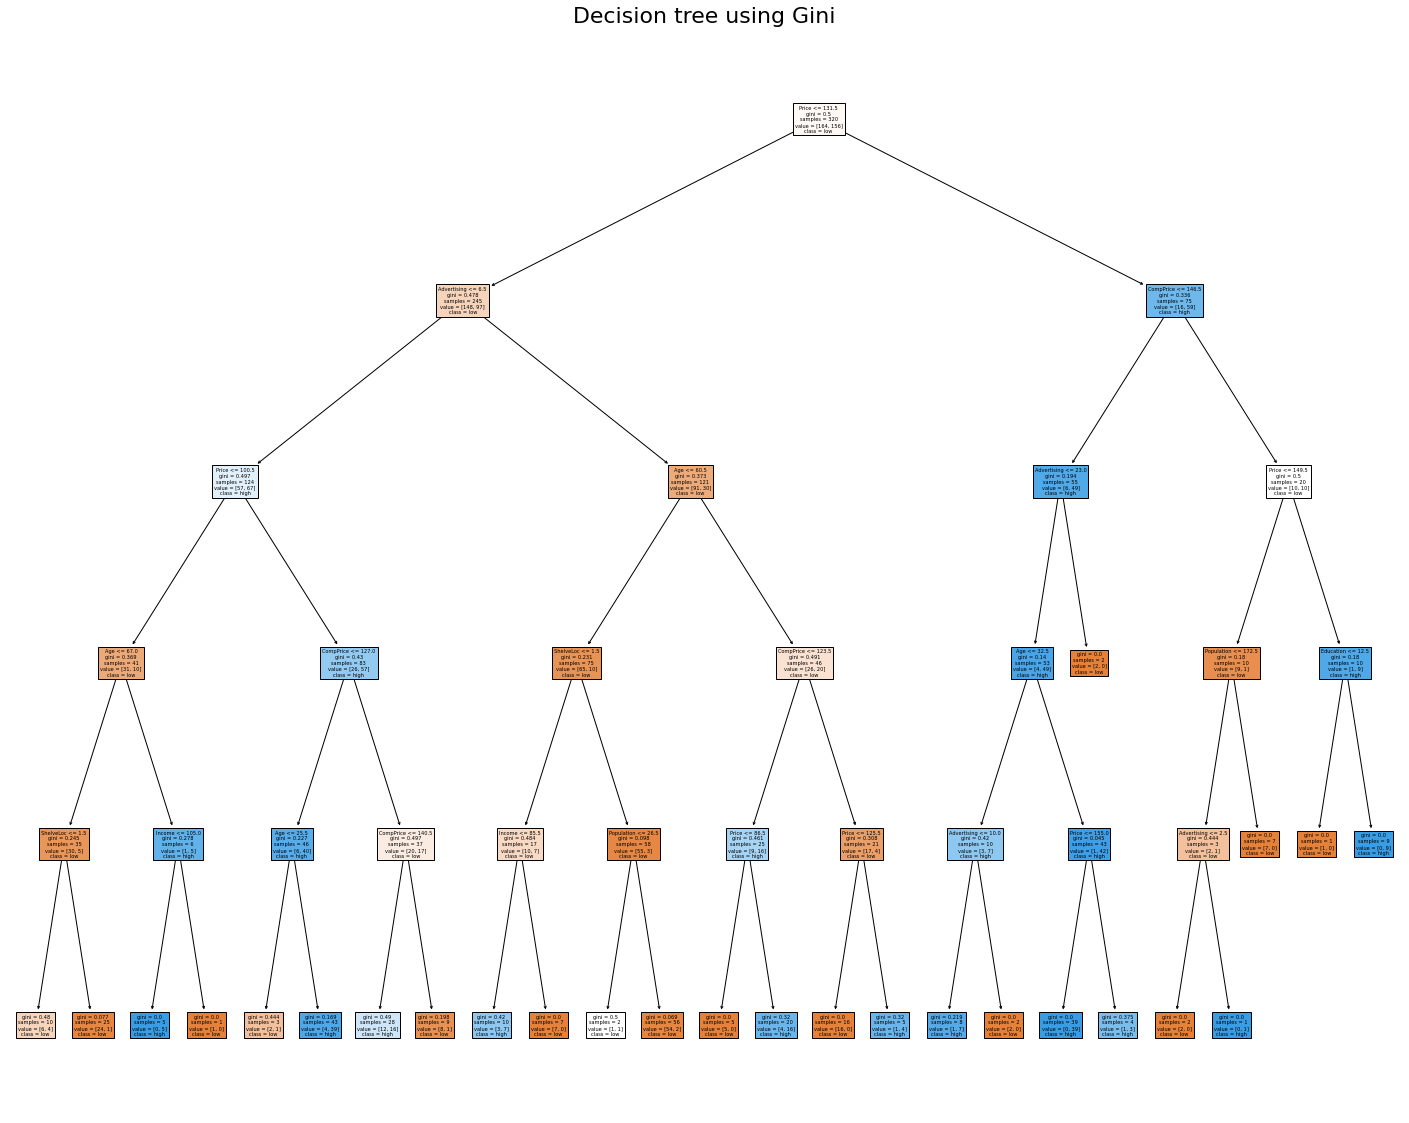

In [27]:
# Plotting the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini1,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

#### From the above decision tree 3 most important features affecting the sales are
1) Price

2) Advertising

3) Comp Price

### Hence we can conclude that both the Entropy and Gini criteria gives us best result at max depth = 5 and 3 most importand features for the both are same viz. Price, Advertising & Comp Price